<a href="https://colab.research.google.com/github/fernandosfx/Exerc-cio_tmdb/blob/main/An%C3%A1lise_de_avalia%C3%A7%C3%B5es_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de um banco de avaliações de filmes

A seguir consta uma análise exploratória a respeito de um banco de dados que armazena informações de um conjunto de filmes que foram avaliados por diversos usuários. Utilizando as bibliotecas Pandas e Seaborn, estudaremos o comportamento dos dados e criaremos visualizações que ilustrem esse comportamento, a fim de tirar conclusões relevantes sobre o padrão de avaliação desse grupo de usuários.


---



In [1]:
import pandas as pd
# Importa biblioteca Pandas

notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
# Lê o arquivo CSV e atribui a um dataframe com nome "notas"
notas.head()
# Exibe as 5 primeiras linhas do dataframe

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
# Renomeia as colunas para nomes em potuguês
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas['nota'].unique()
# Mostra todos os valores que aparecem pelo menos 1 vez na coluna "nota"
notas['nota'].value_counts()
# Conta quantas vezes cada valor único se repete no dataframe

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


<Axes: ylabel='Frequency'>

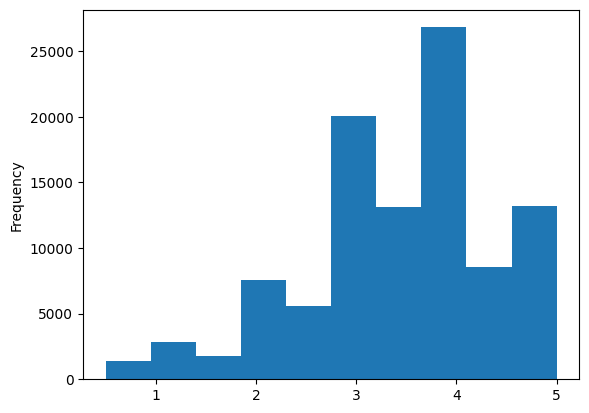

In [4]:
notas["nota"].plot(kind='hist')
# Cria um gráfico do tipo Histograma, da distribuição de valores da variável "nota"

<Axes: ylabel='nota'>

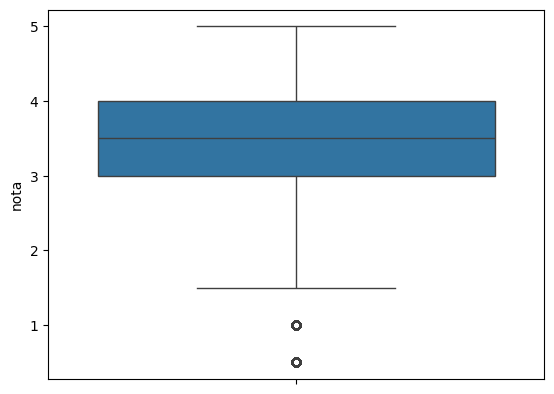

In [5]:
import seaborn as sns
# Importa biblioteca Seaborn, para visualização de dados
sns.boxplot(notas["nota"])
# Cria um Boxplot usando a biblioteca Seaborn

In [6]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
notas.query("filmeId==1")["nota"].mean()
# Busca no dataframe "notas" por todas as avaliações do filme com ID 1 e tira uma média dos valores
notas.query("filmeId==2")["nota"].mean()
# Faz o mesmo para o filme com ID igual a 2

3.4318181818181817

In [8]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
# Cria um novo dataframe, agrupando os dados por filme, atrelando a cada um a média dos valores da coluna "nota" que aparecem junto de um mesmo "filmeID"
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

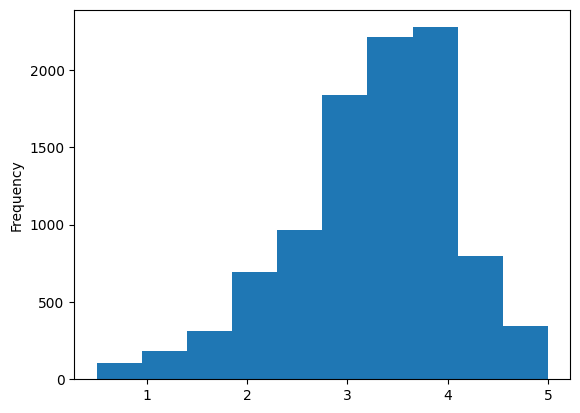

In [9]:
medias_por_filme.plot(kind="hist")
# Cria um Histograma que mostra a frequência de cada intervalo de valores para as médias das notas

<Axes: ylabel='nota'>

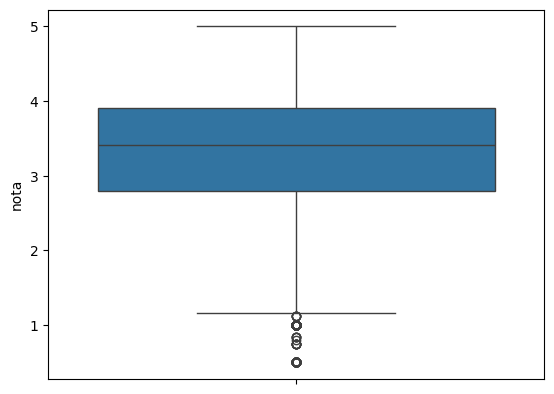

In [10]:
sns.boxplot(medias_por_filme)
# cria um Boxplot que ajuda a visualizar as diferentes "regiões" na distribuição da variável

In [11]:
medias_por_filme.describe()
# Cria uma rápida descrição estatística do dataframe, indicando o número de pontos, valores mínimo e máximo, média e limites de cada Quartil

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000




---


# Análise de dados de filmes do banco do TMDB
Até agora, a análise dos dados teve como foco estudar o comportamento de avaliações por parte dos usuários.

Foram levantados histogramas para entender o padrão global das notas (Variável Quantitativa Discreta), o perfil da distribuição das médias e as características estatísticas básicas desse conjunto de dados.

Agora, vamos fazer uma análise mais focada nos filmes em si e no comportamento de outras variáveis, como Língua Original (Variável Qualitativa Nominal) e Orçamento (Variável Quantitativa Contínua).


---



In [12]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


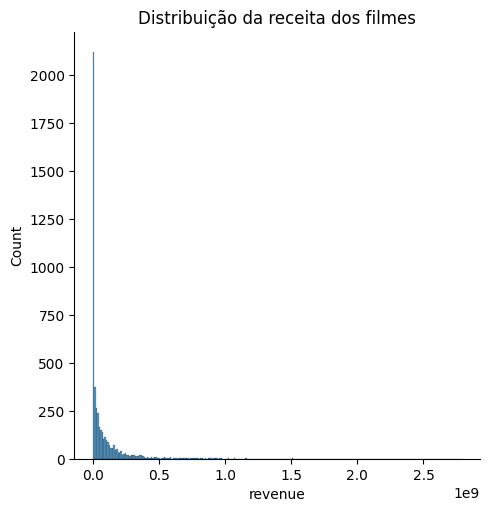

In [14]:
import matplotlib.pyplot as plt
# Importa a biblioteca MatPlot, usada para customizar gráficos e visualizações

sns.displot(tmdb["revenue"])
# Cria um gráfico de distribuição da variável "revenue" utilizando o Seaborn
plt.title("Distribuição da receita dos filmes")
# Utiliza o MatPlot para dar um título ao gráfico
plt.show()
# Pede para apenas mostrar o gráfico, evitando qualquer outra mensagem de retorno

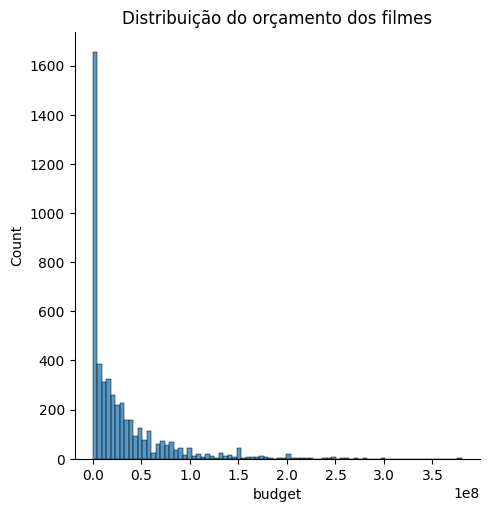

In [15]:
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [16]:
tmdb.info()
# Traz um resumo do dataframe, indicando as colunas existentes, o número de células preenchidas em cada uma e o tipo de variável

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

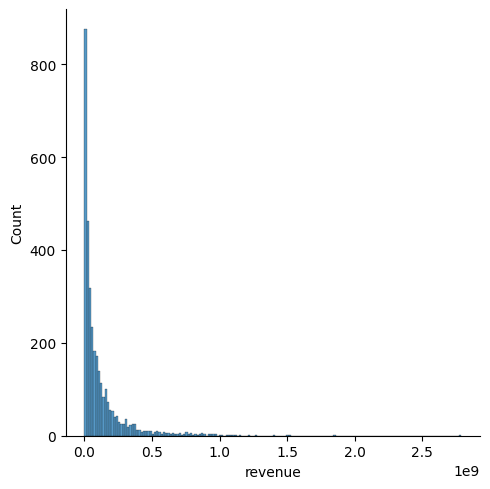

In [17]:
com_faturamento = tmdb.query("revenue > 0")
# Filtra os filmes que não estão com receita registrada, para não poluir a análise
sns.displot(com_faturamento["revenue"])

In [21]:
tmdb["original_language"].unique()
# Mostra todas as línguas indicadas nos filmes

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [22]:
tmdb["original_language"].value_counts()
# Mostra as quantidades de filmes em cada idioma

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [29]:
tmdb["original_language"].value_counts().index
# Transforma a coluna em um array

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [26]:
tmdb["original_language"].value_counts().values
# Cria um array que armazena a coluna "count", que exibe as quantidades de filmes em cada língua

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [30]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
# Cria um novo dataframe específico da coluna "original_language", relacionando com a contagem de filmes com o mesmo idioma
contagem_de_lingua.columns = ["original_language", "total"]
# Nomeia as colunas do dataframe
contagem_de_lingua.head()
# Exibe apenas os 5 primeiros elementos

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

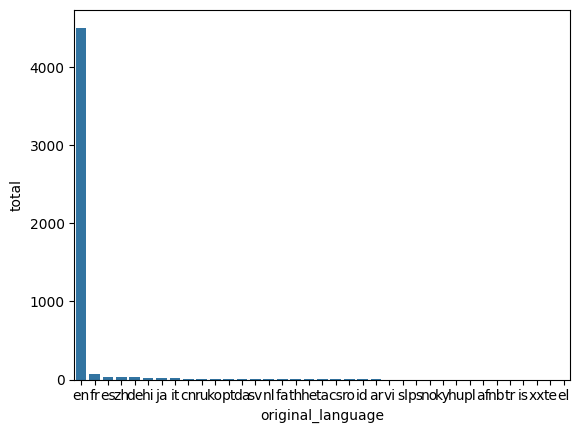

In [31]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)
# Cria um gráfico de barras para associar variáveis nos eixos X e Y de um dataframe declarado

<Axes: xlabel='original_language', ylabel='count'>

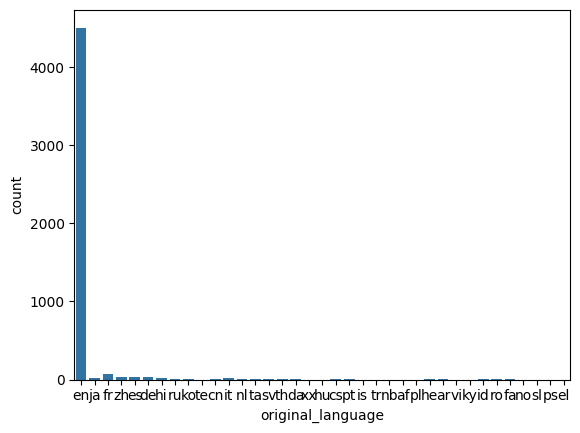

In [32]:
sns.countplot(data=tmdb, x="original_language")
# Similar ao Barplot, mas usado para fazer a contagem de variáveis categóricas de um dataframe.
# Para usar o Countplot não foi necessário criar um novo dataframe para realizar a contagem dos idiomas
# Não permite filtros e flexibilidade no manuseio dos dados plotados

In [33]:
total_por_lingua = tmdb["original_language"].value_counts()
# Cria uma tabela relacionando a quantidade de filmes por idioma
total_geral = total_por_lingua.sum()
# Soma todos os valores, resultando no total de filmes com idioma declarado
total_de_ingles = total_por_lingua.loc["en"]
# Conta apenas os filmes no idioma Inglês
total_do_resto = total_geral - total_de_ingles
# Conta os filmes de todos os outros idiomas, exceto inglês

print(total_geral, total_de_ingles, total_do_resto)
# Imprime os números de filmes de cada conjunto

4803 4505 298


In [34]:
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
# Cria um dicionário com os valores de quantidade de filmes em inglês e de filmes em outros idiomas
dados = pd.DataFrame(dados)
# Transforma o dicionário em um dataframe
dados
# Imprime o dataframe "dados"

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

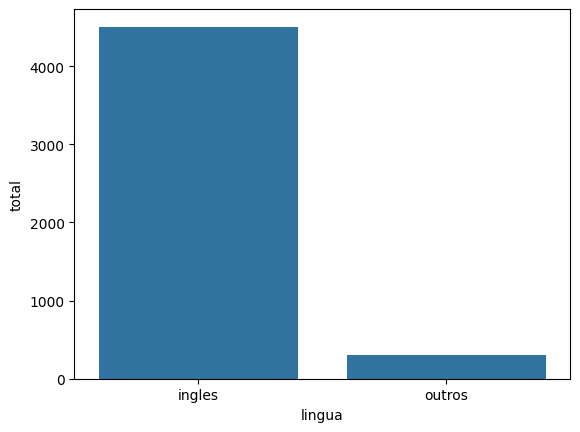

In [35]:
sns.barplot(x="lingua", y="total", data = dados)
# Cria gráfico de barras que compara o número de filmes em inglês com o número de filmes em outros idiomas

In [36]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
# Busca no dataframe todos os filmes com idioma diferente de inglês e conta a frequência de cada língua
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


<Axes: xlabel='original_language', ylabel='count'>

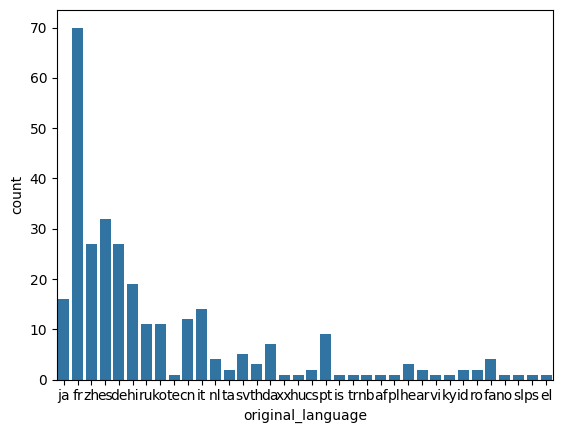

In [37]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language")
# Cria um gráfico de variável categórica, tendo como fonte o dataframe que filtra os filmes com idioma inglês

<Axes: xlabel='original_language', ylabel='count'>

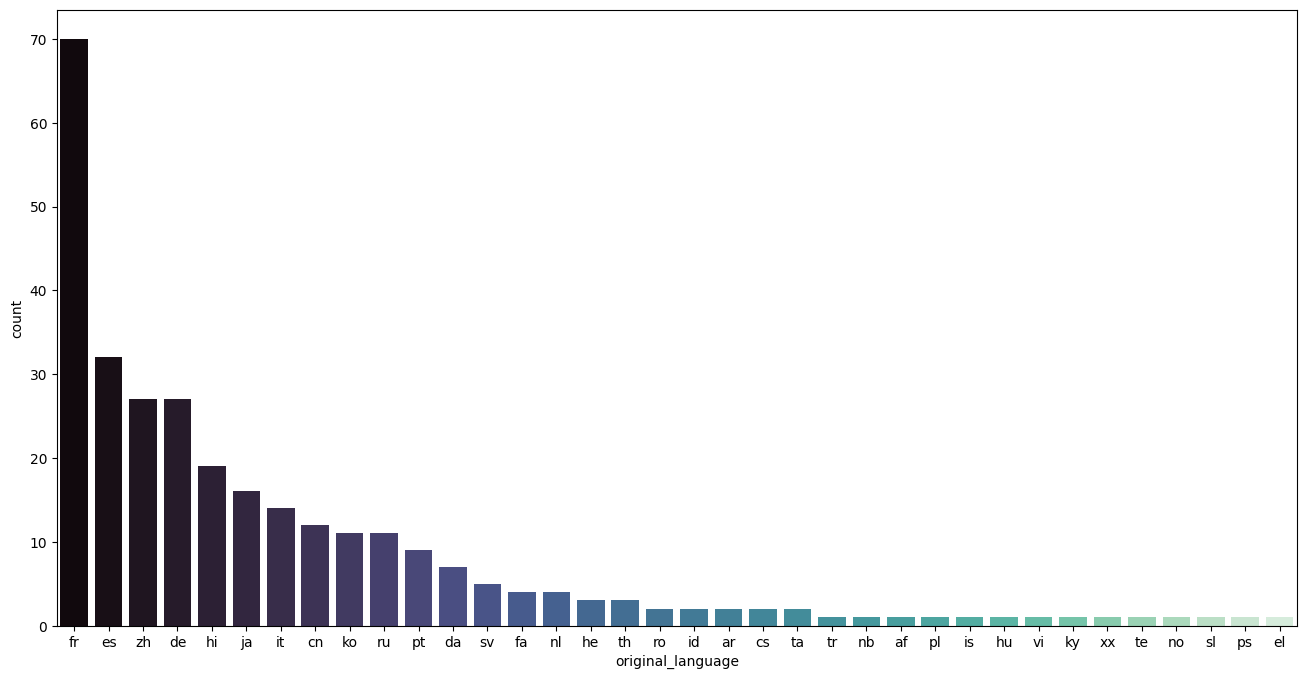

In [38]:
plt.figure(figsize=(16, 8))
# Define as proporções da figura do gráfico
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              # Pede para ordenar os filmes de acordo com o Index
              palette="mako",
              # Atribui uma paleta de cores padrão da biblioteca
              hue="original_language",
              # Define qual coluna do dataframe definirá a cor da barra. Nesse caso, será o mesmo que o eixo X
              hue_order=total_de_outros_filmes_por_lingua.index,
              # Pede para ordenar as cores da paleta de acordo com o Index
              x="original_language")

---

# Tratamento Estatístico de Dados

A partir de agora, faremos uma análise estatística e comparar os dados dos dois primeiros filmes da nossa base de dados inicial.



---

In [39]:
filmes.head(3)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [40]:
notas_do_toy_story = notas.query("filmeId==1")["nota"]
notas_do_jumanji = notas.query("filmeId==2")["nota"]
# Cria arrays armazenando apenas as avaliações deixadas por cada usuário no filme em questão

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()
# Utiliza a biblioteca Pandas para calcular as médias de cada conjunto de valores

print(media_do_toy_story, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [42]:
mediana_do_toy_story = notas_do_toy_story.median()
mediana_do_jumanji = notas_do_jumanji.median()
# Utiliza o Pandas para calcular as medianas de cada conjunto de dados

print(f"Média do Toy Story {media_do_toy_story}")
print(f"Mediana do Toy Story {mediana_do_toy_story }" )
print(f"Média do Jumanji {media_do_jumanji }")
print(f"Mediana do Jumanji {mediana_do_jumanji }" )

Média do Toy Story 3.9209302325581397
Mediana do Toy Story 4.0
Média do Jumanji 3.4318181818181817
Mediana do Jumanji 3.5


In [44]:
desvio_padrao_toy_story = notas_do_toy_story.std()
desvio_padrao_jumanji = notas_do_jumanji.std()
# Calcula os desvios padrão de cada conjunto de dados

print(f"Desvio padrão do Toy Story {desvio_padrao_toy_story }")
print(f"Desvio padrão do Jumanji {desvio_padrao_jumanji }")

Desvio padrão do Toy Story 0.8348591407114045
Desvio padrão do Jumanji 0.8817134921476455


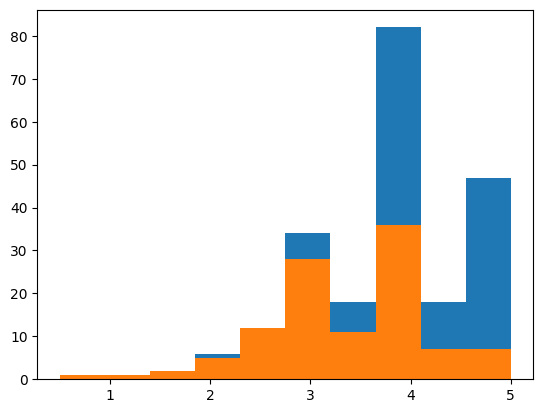

In [49]:
plt.hist(notas_do_toy_story)
plt.hist(notas_do_jumanji)
# Plota histogramas das distribuição de notas de cada filme numa mesma visualização
plt.show()

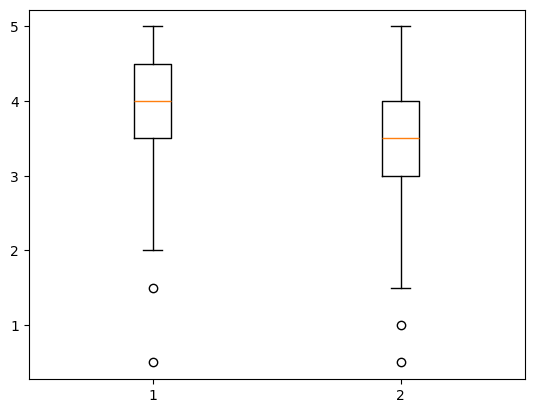

In [48]:
plt.boxplot([notas_do_toy_story, notas_do_jumanji])
# Cria Boxplots de ambos conjuntos de dados em uma mesma visualização, ajudando a comparar as análises e distribuições
plt.show()